## Building a Chatbot using LangGraph

In [3]:
# pip install langgraph

"""
Name: langgraph
Version: 0.6.10
Summary: Building stateful, multi-actor applications with LLMs
Home-page: 
Author: 
Author-email: 
License-Expression: MIT
Location: 
Requires: langchain-core, langgraph-checkpoint, langgraph-prebuilt, langgraph-sdk, pydantic, xxhash
"""

'\nName: langgraph\nVersion: 0.6.10\nSummary: Building stateful, multi-actor applications with LLMs\nHome-page: \nAuthor: \nAuthor-email: \nLicense-Expression: MIT\nLocation: \nRequires: langchain-core, langgraph-checkpoint, langgraph-prebuilt, langgraph-sdk, pydantic, xxhash\n'

In [43]:
# Loading important packages

import os
from langgraph.graph import StateGraph # State
from typing import Annotated 
from typing_extensions import TypedDict # To Construct Agent State
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI 

## Loading the env file
from dotenv import load_dotenv, find_dotenv 
if load_dotenv(find_dotenv(), override=True):
    print(".env file loaded!")
else:
    print(".env file not found")

## Loading the OpenAI API Key
api_key = os.environ.get("OEPNAI_API_KEY")
if api_key:
    print("got the OpenAI API Key")
else:
    print("No OPENAI API KEY found")

## Configure the OpenAI API Key
client = ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=api_key)
if client: 
    print("OpenAI API KEY Authenticated")
else:
    print("Authentication Rejected, retry")

.env file loaded!
No OPENAI API KEY found
OpenAI API KEY Authenticated


In [16]:
from IPython.display import Image, display

# Graph State
class State(TypedDict):
    messages: Annotated[list, add_messages]  # messages are of type list, and messages at each node will be added but not overwritten.

# Build Workflow
graph_builder = StateGraph(State)
# workflow = StateGraph(State)

# LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)


# Nodes
## LLM Node
def chatbot(state: State):
    """This function takes current state as an input and returns a dictionary with updated messages list"""
    ### Method 1
    return {"messages": [llm.invoke(state["messages"])]}
    
    ### Method 2
    #msg = llm.invoke(state["messages"])
    #return {"messages":msg.content}

# Adding Nodes to the graph
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

# To run our graph we need to compile it
graph = graph_builder.compile()


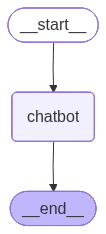

In [17]:
# To Visualize or Show Worflow
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
# Ascii Representation of Graph
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | chatbot |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


#### Running the Chatbot

In [10]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ['quit', 'exit', 'bye', 'q']:
        print("goodbye")
        break
    
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print(f"Assistant: {value["messages"][-1].content}") # prints the last message content from assistant response
            print("-"*50)

Assistant: The average distance from the Earth to the Moon is approximately 384,400 kilometers (about 238,855 miles). This distance can vary slightly due to the Moon's elliptical orbit around the Earth.
--------------------------------------------------
goodbye


In [ ]:
# Chatbot using LangGraph
# Loading important packages

import os
from langgraph.graph import StateGraph # State
from typing import Annotated 
from typing_extensions import TypedDict # To Construct Agent State
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI 

# Loading the env file
from dotenv import load_dotenv, find_dotenv 
if load_dotenv(find_dotenv(), override=True):
    print(".env file loaded!")
else:
    print(".env file not found")

# Loading the OpenAI API Key
api_key = os.environ.get("OEPNAI_API_KEY")
if api_key:
    print("got the OpenAI API Key")
else:
    print("No OPENAI API KEY found")

# Configure the OpenAI API Key
client = ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=api_key)
if client: 
    print("OpenAI API KEY Authenticated")
else:
    print("Authentication Rejected, retry")

# Graph
class State(TypedDict):
    messages:Annotated[list, add_messages]

# Workflow
workflow = StateGraph(State)

# Setup LLM API
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)

# Define Nodes
## LLM Node
def chatbot(state: State):
    """This function takes present State as an input and returns llm output."""
    msg = llm.invoke(state["messages"])
    return {"messages" : msg.content}

# Connect Nodes
workflow.add_node("chatbot", chatbot)
workflow.set_entry_point("chatbot")
workflow.set_finish_point("chatbot")

# Compile Graph
graph = workflow.compile()

# Visualize Graph
visualize_graph = display(Image(graph.get_graph().draw_mermaid_png()))

# Simple Chatbot using LangGraph
print("WELCOME TO CHATBOT - LangGraph")
while True: 
    user_input = input("User: ")
    if user_input.lower() in ["bye", "quit", "exit", "q"]:
        print("Exiting..")
        break

    elif user_input.lower() in ["visualize", "visualise"]:
        print(visualize_graph)
        break
        
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print(f"Assistant Response: {value["messages"][-1].content}")
            print("-"*100)   
    

## Travily AI

- ### Tavily is the web layer that supplies enterprise-grade agents with fast, real-time web data through simple, agent-first APIs, purposely built for AI.

- ### Tavily Search API reviews multiple sources to find the most relevant content from each source, delivering concise, ready-to-use information optimized for LLM context.

- ### Tavily offers scalable `Search`,` Extract`, `Map`, and `Crawl` APIs, all built specifically to enrich agents.

In [3]:
# Finding .env File
from dotenv import load_dotenv, find_dotenv
if not load_dotenv(find_dotenv(), override=True):
    raise ValueError(".env file not found")
else:
    print(".env file found")

.env file found


In [4]:
# Configuring API key
import os 
from tavily import TavilyClient

client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

if client:
    print("API Key configured successfully")
else:
    print("API Key not found or incorrect.")

API Key configured successfully


In [8]:
response = client.search(query="What's the price of Bitcoin today?")
print(response)

{'query': "What's the price of Bitcoin today?", 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://finance.yahoo.com/quote/BTC-USD/', 'title': 'Bitcoin BTC (BTC-USD) Live Price, News, Chart & ...', 'content': 'The last known price of Bitcoin is 111,377.2202793 USD and is down -3.34 over the last 24 hours.', 'score': 0.98534, 'raw_content': None}, {'url': 'https://www.coinbase.com/price/bitcoin', 'title': 'Bitcoin Price, BTC Price, Live Charts, and Marketcap', 'content': "Price of BTC is $114,663.45 right now. Looking at Bitcoin's historical prices, it's -10% down from the previous week's price of $123,883.71, and observed a -1%", 'score': 0.98392, 'raw_content': None}, {'url': 'https://bitflyer.com/en-us/bitcoin-chart', 'title': 'Bitcoin Price Chart (BTC/USD)', 'content': 'Check out the current Bitcoin (BTC) price, market cap, historical volatility, and buy Bitcoin on bitFlyer today with as little as $1!', 'score': 0.97784, 'raw_content': None}, {'u

In [10]:
for result in response["results"]:
    print(f"Title: {result['title']}, URL: {result['url']}, Content:{result['content']}")

Title: Bitcoin BTC (BTC-USD) Live Price, News, Chart & ..., URL: https://finance.yahoo.com/quote/BTC-USD/, Content:The last known price of Bitcoin is 111,377.2202793 USD and is down -3.34 over the last 24 hours.
Title: Bitcoin Price, BTC Price, Live Charts, and Marketcap, URL: https://www.coinbase.com/price/bitcoin, Content:Price of BTC is $114,663.45 right now. Looking at Bitcoin's historical prices, it's -10% down from the previous week's price of $123,883.71, and observed a -1%
Title: Bitcoin Price Chart (BTC/USD), URL: https://bitflyer.com/en-us/bitcoin-chart, Content:Check out the current Bitcoin (BTC) price, market cap, historical volatility, and buy Bitcoin on bitFlyer today with as little as $1!
Title: Buy Bitcoin - BTC Price Today, Live Charts and News, URL: https://robinhood.com/us/en/crypto/BTC/, Content:The price of Bitcoin is $115022.97. Buy Bitcoin - BTC with $1. Invest in BTC cryptocurrency with Robinhood in the easiest and fastest way.
Title: BTC USD — Bitcoin Price and

In [11]:
response = client.search(
    query="What are the best programming languages to learn this year?",
    search_depth="advanced", # choose basic for quick results
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False,
    )

print(response)

{'query': 'What are the best programming languages to learn this year?', 'follow_up_questions': None, 'answer': 'In 2025, popular programming languages include Python, JavaScript, and Go. Rust and TypeScript also gain prominence, favored for their performance and type safety. Stay updated to leverage these trends in tech.', 'images': ['https://infographicplaza.com/wp-content/uploads/top-10-programming-languages-infographic-plaza.jpg', 'https://blog.pwskills.com/wp-content/uploads/2023/12/TOP-20-BEST-PROGRAMMING-LANGUAGES-.png', 'https://itechhacks.com/wp-content/uploads/2022/05/Programming-Language.png', 'https://cdn.hackr.io/uploads/posts/attachments/1677927034t0ScViNfXE.png', 'https://codingnomads.com/images/80702583-1fad-4770-1912-bda7901f7a00/public'], 'results': [{'url': 'https://spectrum.ieee.org/top-programming-languages-2025', 'title': 'The Top Programming Languages 2025 - IEEE Spectrum', 'content': 'We detail [our methodology here](https://spectrum.ieee.org/top-programming-lan

In [12]:
# Can be used as Tool for AI Agent
answer = client.qna_search(query="Who won the UEFA Champions League in 2024?")
print(answer)

Real Madrid won the 2024 UEFA Champions League final. They defeated Borussia Dortmund 2-0 in the final held at Wembley Stadium. This victory marked Real Madrid's 15th European Cup.


In [13]:
## Passing Tavily Results to LLM using LangChain

from langchain.adapters.openai import convert_openai_messages # converts dictionaries to LangChain format
from langchain_openai import ChatOpenAI

query = "What is the 'Reflection & Critique' pattern used in agentic applications and LangGraph?"

# Set the Tavily Search
response = client.search(
    query=query,
    max_results=5,
    search_depth="advanced",
)['results']

response

[{'url': 'https://medium.com/aimonks/reflection-agents-with-langgraph-agentic-llm-based-applications-87e43c27adc7',
  'title': 'Reflection Agents With LangGraph | Agentic LLM Based Applications',
  'content': 'In this first article, we’ll go over what is reflection in LLM based applications. Types of reflection agents and their implementations. When to use reflection agents and much more.\n\n## What Is Reflection?\n\nReflection is a prompting strategy used to improve the quality and success rate of agents and similar AI systems. It involves prompting an LLM to reflect on and critique its past actions, sometimes incorporating additional external information such as tools and observations. [...] So, let’s move ahead and create these two agents and have the reflect agent critique the initial response manually, then we’ll move on to doing the same with LangGraph in a more sophisticated and automated manner. Open the `basic_02.py`file and have the following code inside of it. [...] So basic

In [15]:
## Setting up the OpenAI API Prompt

prompt = [
    {
        "role": "system", "content": f"""You are an AI critical thinker research assistant. Your sole purpose is to write well written, objective and structured reports on given text."""
    },
    {
        "role": "user",
        "content": f"""Information: '''{response}''' 
        Using the above information, answer the following query: '''{query}''' in a detailed report."""
    }
]


lc_messages = convert_openai_messages(prompt) # Convert the OpenAI prompt into the Langchain format
lc_messages

[SystemMessage(content='You are an AI critical thinker research assistant. Your sole purpose is to write well written, objective and structured reports on given text.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information: \'\'\'[{\'url\': \'https://medium.com/aimonks/reflection-agents-with-langgraph-agentic-llm-based-applications-87e43c27adc7\', \'title\': \'Reflection Agents With LangGraph | Agentic LLM Based Applications\', \'content\': \'In this first article, we’ll go over what is reflection in LLM based applications. Types of reflection agents and their implementations. When to use reflection agents and much more.\\n\\n## What Is Reflection?\\n\\nReflection is a prompting strategy used to improve the quality and success rate of agents and similar AI systems. It involves prompting an LLM to reflect on and critique its past actions, sometimes incorporating additional external information such as tools and observations. [...] So, let’s move ahead and creat

In [18]:
response = ChatOpenAI(model="gpt-4o-mini").invoke(lc_messages)
print(response.content)

# Detailed Report on the 'Reflection & Critique' Pattern in Agentic Applications and LangGraph

## Introduction
The 'Reflection & Critique' pattern is an emerging strategy in agentic applications, particularly those powered by large language models (LLMs) such as LangGraph. This pattern emphasizes the iterative improvement of outputs generated by AI agents through reflective critique. The following report outlines the definition, mechanisms, types, and practical applications of this pattern based on recent literature.

## Definition of Reflection & Critique
Reflection in the context of agentic applications refers to a prompting strategy that aids AI agents in assessing and improving the outcomes of their generated content. By employing a system of feedback loops, agents are programmed to critique their own outputs critically, thereby enhancing the quality and effectiveness of subsequent iterations. This prompting mechanism incorporates both internal assessments and, where necessary, ex

### Enhancing the ChatBot with Tools

In [20]:
# Define the Tools 
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=3)
tools = [tool] # tools contains only the TavilySearchResults tool


/var/folders/pr/qgdwjqmn1fqfczkrkz6zwsjc0000gn/T/ipykernel_15664/876815667.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=3)


In [22]:
response = tool.invoke("What's GPT 4o mini")
print(response)

[{'title': 'GPT-4o-mini - API, Providers, Stats | OpenRouter', 'url': 'https://openrouter.ai/openai/gpt-4o-mini', 'content': 'GPT-4o-mini GPT-4o mini is OpenAI\'s newest model after GPT-4 Omni, supporting both text and image inputs with text outputs. As their most advanced small model, it is many multiples more affordable than other recent frontier models, and more than 60% cheaper than GPT-3.5 Turbo. It maintains SOTA intelligence, while being significantly more cost-effective. GPT-4o mini achieves an 82% score on MMLU and presently ranks higher than GPT-4 on chat preferences common leaderboards. Check out the launch [...] GPT-4o mini is OpenAI\'s newest model after GPT-4 Omni, supporting both text and image inputs with text outputs.\n\nAs their most advanced small model, it is many multiples more affordable than other recent frontier models, and more than 60% cheaper than GPT-3.5 Turbo. It maintains SOTA intelligence, while being significantly more cost-effective.\n\nGPT-4o mini achi

In [40]:
"""Chatbot using LangGraph with Tivaly Search API as a tool
The Response Obtained by TivalySearchAPI and how the LLM creates a final answer based on the Tavily's Response.
Now LLM can handle queries outside of trained data."""

# Loading important packages

import os
from langgraph.graph import StateGraph  # State
from typing import Annotated
from typing_extensions import TypedDict  # To Construct Agent State
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.adapters.openai import (
    convert_openai_messages,
)  # converts dictionaries to LangChain format
from langchain_openai import ChatOpenAI
from IPython.display import Image, display
from langgraph.prebuilt import (
    ToolNode,
    tools_condition,
)  # Tool Node: Adds Tool in the nodes


# Loading the env file
from dotenv import load_dotenv, find_dotenv

if load_dotenv(find_dotenv(), override=True):
    print(".env file loaded!")
else:
    print(".env file not found")

# Loading the OpenAI API Key
api_key = os.environ.get("OEPNAI_API_KEY")
if api_key:
    print("got the OpenAI API Key")
else:
    print("No OPENAI API KEY found")

# Configure the OpenAI API Key
client = ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=api_key)
if client:
    print("OpenAI API KEY Authenticated")
else:
    print("Authentication Rejected, retry")


# Graph
class State(TypedDict):
    messages: Annotated[list, add_messages]


# Workflow
workflow = StateGraph(State)

tool = TavilySearchResults(max_results=3)  # Defined Tavily Tool
tools = [tool]  # Storing the Tool

# Setup LLM API
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)
llm_with_tools = llm.bind_tools(tools=tools)  # bind llm with Tool - which tool can LLM call.


# Define Nodes
## LLM Node
def chatbot(state: State):
    """This function takes present State as an input and returns llm output."""
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Connect Nodes
workflow.add_node("chatbot", chatbot)

# Tavily Node
tool_node = ToolNode(tools=tools)
workflow.add_node("tools", tool_node)

# Define the Conditional Edges
workflow.add_conditional_edges(  # if the last AI message contains tool calls, route to the tool execution node; otherwise, end the workflow.
    "chatbot",
    tools_condition,  # end the workflow if no tools is called.
)

workflow.add_edge("tools", "chatbot")

workflow.set_entry_point("chatbot")
#workflow.set_finish_point("chatbot")

# Compile Graph
graph = workflow.compile()

.env file loaded!
No OPENAI API KEY found
OpenAI API KEY Authenticated


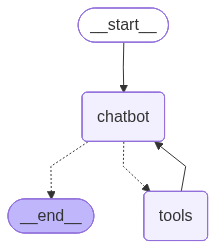

In [41]:
# Visualize Graph
visualize_graph = display(Image(graph.get_graph().draw_mermaid_png()))
visualize_graph

In [42]:
# Simple Chatbot using LangGraph
print("WELCOME TO CHATBOT - LangGraph")
while True: 
    user_input = input("User: ")
    if user_input.lower() in ["bye", "quit", "exit", "q"]:
        print("Exited.")
        break

    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():  
                print("Assistant: ", value["messages"][-1])
            
        print("-"*50)   

WELCOME TO CHATBOT - LangGraph
Assistant:  content='' additional_kwargs={'tool_calls': [{'id': 'call_dDsNRSew2kuBMCBcw4Z3HvEH', 'function': {'arguments': '{"query":"100m swimming gold medal winner Paris Olympics 2024"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 92, 'total_tokens': 120, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CQgdCPS76wziprQ3jwsrkEFNdDCkz', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--51d5b026-7d06-4e42-9b89-8fd8e5a440c9-0' tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': '100m swimming gold medal winner Paris Olympics 2024'}, 'id': 'call_dDsN